In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Total_Pop = 14810000
Datas = np.arange('2020-03-01', '2020-10-25', dtype='datetime64[D]')

In [72]:
# use scypy interpolation?
def med_movel(df, start, end, column):
    start = pd.Timedelta(days = int(start))
    end   = pd.Timedelta(days = int(end))
    idx = df.index.values
    return [df.loc[np.logical_and(day - idx < end, day - idx >= start), column].mean() for day in idx]

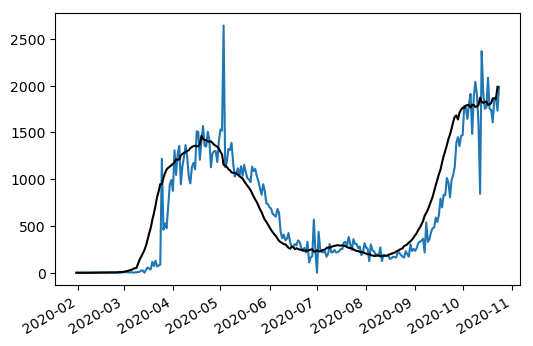

In [89]:
df = pd.read_pickle("data/canada_data.pkl")

df["cases7"]  = med_movel(df, -14, 0, "ncases")
df["deaths7"] = med_movel(df, -14, 0, "ndeaths")

plt.subplots(dpi=100)
plt.plot(df["ncases"])
plt.plot(df["cases7"], "k")
plt.gcf().autofmt_xdate()

In [79]:
mobility_file = "data/2020_CA_Region_Mobility_Report.csv"
df2 = pd.read_csv(mobility_file)

df2.query('sub_region_1 in ["Ontario","Quebec"]', inplace=True)
df2["date"] = pd.to_datetime(df2["date"])
df2.sort_values(by=['date'],inplace=True)


date=df2["date"].unique()

#Calcula a média móvel
#mov = [df2.loc[np.logical_and(day - df2["date"] < pd.Timedelta('7 days'), day - df2["date"] >= pd.Timedelta('-7 days')), "workplaces_percent_change_from_baseline"].mean()*-1 for day in date]
mov = [df2.loc[day == df2["date"], "workplaces_percent_change_from_baseline"].mean()*-1 for day in date]

df2=pd.DataFrame({'date':date,'mov':mov})
df2.set_index('date', drop=True, inplace=True)

df2.head()

df = df[df.index.isin(date)]
df2 = df2[df2.index.isin(df.index.values)]

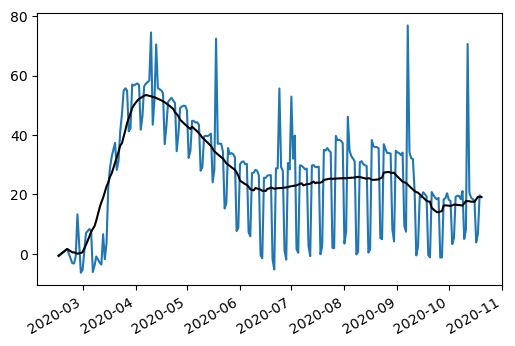

In [80]:
df2["mov7"] = med_movel(df2, -14, 14, "mov")

plt.subplots(dpi=100)
plt.plot(df2["mov"])
plt.plot(df2["mov7"], "k")
plt.gcf().autofmt_xdate()

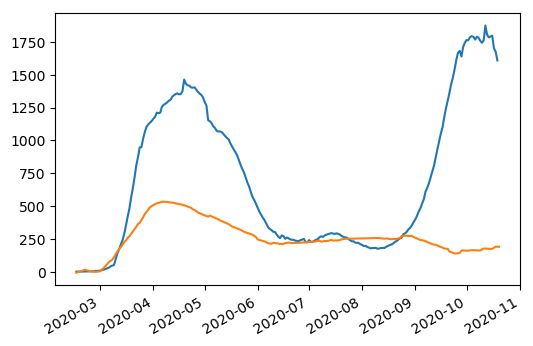

In [82]:
plt.subplots(dpi=100)
plt.plot(df["cases7"])
plt.plot(df2["mov7"] * 10)
plt.gcf().autofmt_xdate()

https://health-infobase.canada.ca/src/data/covidLive/covid19-download.csv